# IMDB Data Project
Craig Gossen

**This project is to analyze what makes a movie successful and provide recommendations to the stakeholder on how to make a successful movie.** 

Data Source: (https://www.themoviedb.org/)


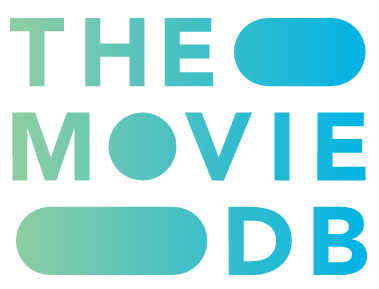

## Basic Imports & Load Prior Data

In [1]:
# Imports
import pandas as pd

#!pip install tqdm #(only load once)
#!pip install tmdbsimple #(only need to run once)

In [2]:
#Load the data
titles = pd.read_csv('Data/inprocess_titles.csv.gz', low_memory=False)

In [3]:
#Load the data
ratings = pd.read_csv('Data/inprocess_ratings.csv.gz', low_memory=False)

In [4]:
#Load the data
akas = pd.read_csv('Data/inprocess_akas.csv.gz', low_memory=False)

## Custom Functions


In [5]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [6]:
def get_movie_with_rating(movie_id):
    """Adapted from source = https://github.com/celioa/tmdbsimple"""
    # Get movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    #save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    
    # Loop for countries in releaes
    for c in releases['countries']:
        #if the country abbreviation ==US
        if c['iso_3166_1'] == 'US':
            # save a "certification" key in info with the certification
            info['certification'] = c['certification']
            
    return info

## Load API

In [7]:
#Import json and open credentials
import json
with open('/Users/craig/.secret/tmdb_api.json') as f: #change the path to match YOUR path!!
    login = json.load(f)
login.keys()

dict_keys(['session_id', 'api_key'])

In [8]:
#Import TMDB API with credentials
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api_key']

In [9]:
#Set a timeout
tmdb.REQUESTS_TIMEOUT = 5  # seconds

### Testing Extraction of Movie Data Using API


In [10]:
## make a movie object using the .Movies function from tmdb
movie = tmdb.Movies(603)
info=movie.info()

In [11]:
info.keys()

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [12]:
year = info['release_date'][:4] 
year

'1999'

In [13]:
budget = info['budget']
budget

63000000

In [14]:
info['imdb_id']

'tt0133093'

The ultimate goal is to collect TMDB data ('budget', 'revenue' and 'certification')

In [15]:
#function to certification
def get_movie_with_rating(movie_id):   
  

    """Adapted from source = https://github.com/celiao/tmdbsimple"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    info = movie.info()
    
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return info

In [16]:
test = get_movie_with_rating("tt0848228")


In [17]:
## testing our function by looping through a list of ids

test_ids = ["tt0848228", "tt0115937","tt0848228","tt0332280"]
results = []
errors = []
for movie_id in test_ids:
    
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except Exception as e: 
        errors.append([movie_id, e])
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.707,28122,PG-13
1,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.707,28122,PG-13
2,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.879,10114,PG-13


In [29]:
print(f"- Number of errors: {len(errors)}")
errors

- Number of errors: 1


[['tt0115937',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0115937?api_key=bb23df4e5ffbe1784653df4941ea566e')]]

## Project - Extracting *All* Movie Data from TMDB via API

In [18]:
import os, math, time
from tqdm.notebook import tqdm_notebook

In [19]:
# Specify folder 
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'inprocess_akas.csv.gz',
 'inprocess_ratings.csv.gz',
 'inprocess_titles.csv.gz',
 'title.akas.tsv.gz',
 'title.basics (1).tsv.gz',
 'title.ratings.tsv.gz']

In [20]:
# Load in the dataframe from project part 1 as basics:
basics = pd.read_csv('Data/inprocess_titles.csv.gz')
basics['startYear'] = basics['startYear'].astype(float)
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84809 entries, 0 to 84808
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          84809 non-null  object 
 1   titleType       84809 non-null  object 
 2   primaryTitle    84809 non-null  object 
 3   originalTitle   84809 non-null  object 
 4   isAdult         84809 non-null  int64  
 5   startYear       84809 non-null  float64
 6   endYear         0 non-null      float64
 7   runtimeMinutes  84809 non-null  int64  
 8   genres          84809 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.8+ MB


In [21]:
#Setting years to aquire for TMDB
YEARS_TO_GET = [2000] #,2001]

In [22]:
#Empty list for errors
errors = [ ]

In [23]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    
    
        ## Check if JSON_FILE exists
    file_exists = os.path.isfile(JSON_FILE)
    
    ## If it DOES exist:
    if file_exists == True:
    
    #RELOOK AND COMMENT OUT CODE
    
        ## Check if user wants to delete if exists
        if delete_if_exists==True:
            
            print(f"[!] {JSON_FILE} already exists. Deleting previous file...")
            ## delete file and confirm it no longer exits.
            os.remove(JSON_FILE)
            ## Recursive call to function after old file deleted
            create_json_file(JSON_FILE,delete_if_exists=False)
        else:
            print(f"[i] {JSON_FILE} already exists.")            
            
            
    ## If it does NOT exist:
    else:
        
        ## INFORM USER AND SAVE EMPTY LIST
        print(f"[i] {JSON_FILE} not found. Saving empty list to new file.")
        
        ## CREATE ANY NEEDED FOLDERS
        # Get the Folder Name only
        folder = os.path.dirname(JSON_FILE)
        
        ## If JSON_FILE included a folder:
        if len(folder)>0:
            # create the folder
            os.makedirs(folder,exist_ok=True)
        ## Save empty list to start the json file
        with open(JSON_FILE,'w') as f:
            json.dump([],f) 
            
       
    
    
    #Saving new year as the current df #Copy the row where 'startYear == 2000'
    df = basics.loc[basics['startYear']==YEAR].copy()
   
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    
    #Safeguards
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    
    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    
    #______________________________________________________________________
    #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            
        except Exception as e:
            errors.append([movie_id, e])
    #________________________________________________________________________
    #Save the list of movies
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

print(f"- Total errors: {len(errors)}")

YEARS:   0%|          | 0/1 [00:00<?, ?it/s]

[i] Data/tmdb_api_results_2000.json not found. Saving empty list to new file.


KeyError: 'imdb_id'

In [ ]:
final_year_df.head()

In [24]:
previous_df.head()

""
